# Basic Tabular Data Viewing with Temperature and Humidity

In [71]:
!pip install pandas Pyarrow

You should consider upgrading via the 'D:\soch1\Projects\IoT_course\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [72]:
import pandas as pd

# Create a DataFrame with ten records
data = {
    'Temperature': [20, 21, 19, 22, 21, 20, 23, 24, 22, 21],
    'Humidity': [30, 32, 31, 33, 32, 31, 34, 35, 33, 32]
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('data_tst.csv', index=False)

# Read the CSV file into a DataFrame
df = pd.read_csv('data_tst.csv')

# Display the DataFrame
df

,Temperature,Humidity
0,20,30
1,21,32
2,19,31
3,22,33
4,21,32
5,20,31
6,23,34
7,24,35
8,22,33
9,21,32


### This data represents the indoor air quality at different times, with temperature in °C, humidity in %, CO2 in ppm (parts per million), and TVOC (Total Volatile Organic Compounds) in ppb (parts per billion). All values are within the recommended ranges for good indoor air quality. Please note that the CO2 and TVOC values are hypothetical and may not represent typical indoor levels

In [73]:
# Load the data
df = pd.read_csv('latest_telemetry.csv')

df

,Last update time,Key,Value
0,20/02/2024 10:44,CO2,403.0
1,20/02/2024 10:44,Humidity,44.0
2,20/02/2024 10:44,TVOC,0.0
3,20/02/2024 10:44,Temperature,20.5


In [74]:
# Pivot the DataFrame
df_pivot = df.pivot(index='Last update time', columns='Key', values='Value')

# Reset the index
df_pivot.reset_index(inplace=True)

# Save the transformed data
df_pivot.head()

Key,Last update time,CO2,Humidity,TVOC,Temperature
0,20/02/2024 10:44,403.0,44.0,0.0,20.5


In [75]:
def transform_data(latest_telemetry_file, data_file):
    # Load the existing data
    df_data = pd.read_csv(data_file)

    # Load the new data
    df_latest = pd.read_csv(latest_telemetry_file)

    # Pivot the new DataFrame
    df_latest_pivot = df_latest.pivot(index='Lastupdatetime', columns='Key', values='Value')

    # Reset the index
    df_latest_pivot.reset_index(inplace=True)

    # Append the new data to the existing data
    df_combined = pd.concat([df_data, df_latest_pivot])

    return df_combined

In [76]:
def save_data(df, data_file):
    # Save the combined data
    df.to_csv(data_file, index=False)

In [77]:
#  check if .csv exists before trying to read it. If it doesn’t exist, it will create an empty DataFrame and save it as .csv
import os

def transform_data(latest_telemetry_file, data_file):
    # Check if data_file exists
    if os.path.exists(data_file):
        # Load the existing data
        df_data = pd.read_csv(data_file)
    else:
        # Create an empty DataFrame with the required columns
        df_data = pd.DataFrame(columns=['Lastupdatetime', 'Temperature', 'Humidity', 'CO2', 'TVOC'])

    # Load the new data
    df_latest = pd.read_csv(latest_telemetry_file)

    df_latest = df_latest.rename(columns={'Last update time': 'Lastupdatetime'})

    # Pivot the new DataFrame
    df_latest_pivot = df_latest.pivot(index='Lastupdatetime', columns='Key', values='Value')

    # Reset the index
    df_latest_pivot.reset_index(inplace=True)

    # Append the new data to the existing data
    df_combined = pd.concat([df_data, df_latest_pivot])

    return df_combined

## Main Function

In [78]:
latest_telemetry_file = 'latest_telemetry.csv'
data_file = 'data01.csv'


In [79]:
# Unccomment when new data are available
# df_combined = transform_data(latest_telemetry_file, data_file)
# save_data(df_combined, data_file)

In [80]:
aq = pd.read_csv('data01.csv')
aq.tail()

,Lastupdatetime,Temperature,Humidity,CO2,TVOC
1552,02/03/2024 05:04,20.5,58.2,409.0,0.0
1553,03/03/2024 05:14,20.5,58.6,409.5,0.0
1554,03/03/2024 05:24,20.5,44.0,403.0,0.0
1555,03/03/2024 05:34,20.0,54.0,402.0,0.0
1556,03/03/2024 05:44,21.5,44.0,403.0,0.0


In [81]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lastupdatetime  1557 non-null   object 
 1   Temperature     1557 non-null   float64
 2   Humidity        1557 non-null   float64
 3   CO2             1557 non-null   float64
 4   TVOC            1557 non-null   float64
dtypes: float64(4), object(1)
memory usage: 60.9+ KB


## Plot Simple Graphs

In [82]:
import matplotlib.pyplot as plt

In [83]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Temperature (°C)')

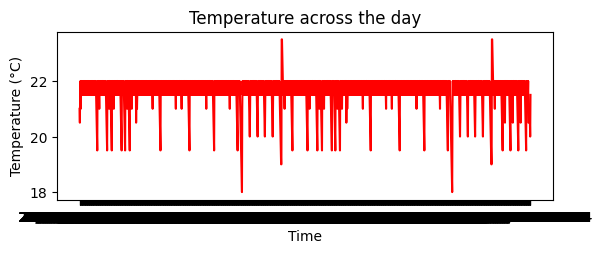

In [84]:
# Temperature graph
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(aq['Lastupdatetime'], aq['Temperature'], color='red')
plt.title('Temperature across the day')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

In [85]:
plt.show()

In [86]:
from datetime import datetime, timedelta

# Get the current time
now = datetime.now()

# Calculate the time 24 hours ago
one_day_ago = now - timedelta(days=1)

# Convert 'Lastupdatetime' to datetime format
#aq['Lastupdatetime'] = pd.to_datetime(aq['Lastupdatetime'])
aq['Lastupdatetime'] = pd.to_datetime(aq['Lastupdatetime'], format='%d/%m/%Y %H:%M')

# Filter the DataFrame to only include data from the last 24 hours
aq_last_24_hours = aq[aq['Lastupdatetime'] >= one_day_ago]


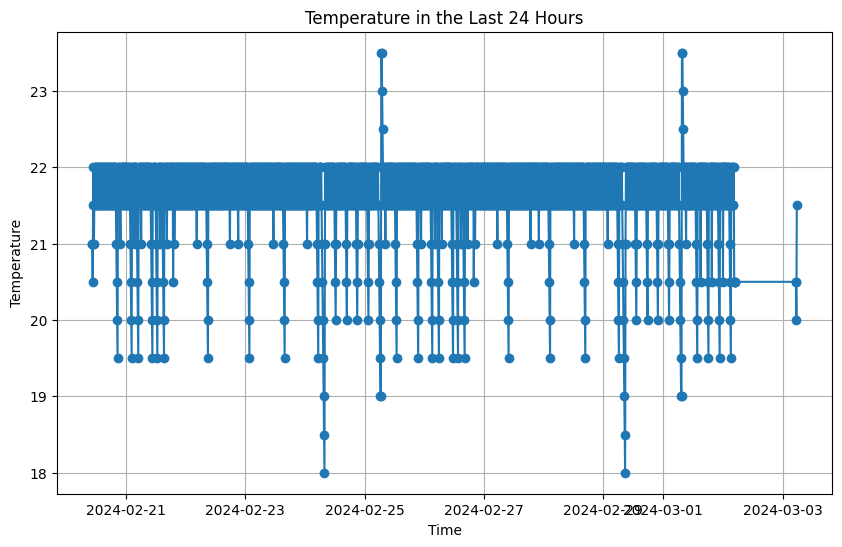

In [87]:
# Plot the temperature data
plt.figure(figsize=(10, 6))
plt.plot(aq_last_24_hours['Lastupdatetime'], aq_last_24_hours['Temperature'], marker='o')
plt.title('Temperature in the Last 24 Hours')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

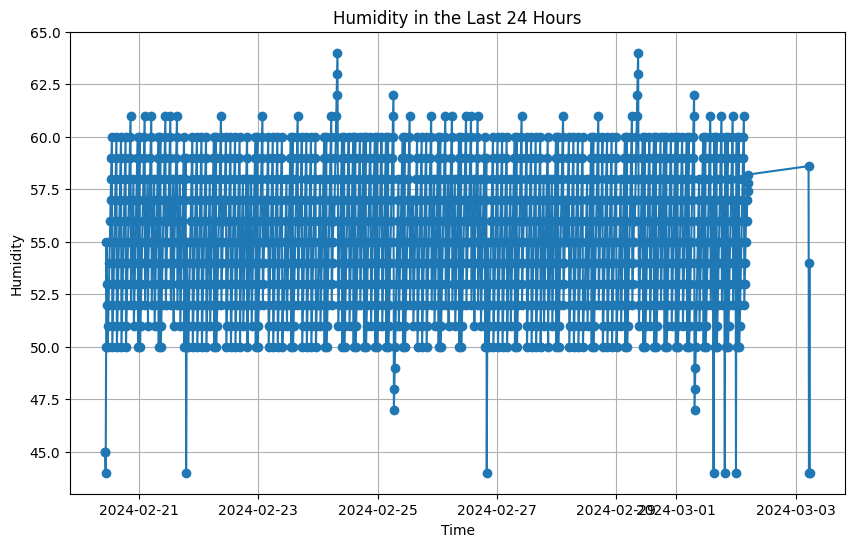

In [88]:
# Plot the humidity data
plt.figure(figsize=(10, 6))
plt.plot(aq_last_24_hours['Lastupdatetime'], aq_last_24_hours['Humidity'], marker='o')
plt.title('Humidity in the Last 24 Hours')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()
